## Part 1 : Image Filtering and Object Identification

In this part we will play with the basics of image filtering (**Question 1**), then develop a simple image querying system which accepts a query image as input and then finds a set of similar images in the database (**Question 2, 3 and 4**).

## Question 1: Image Filtering

In [1]:
## import packages
import numpy as np
from PIL import Image
from scipy.signal import convolve2d as conv2, convolve
import matplotlib.pyplot as plt
import cv2
import math

plt.rcParams["figure.figsize"] = (20,8)

In [2]:
def rgb2gray(rgb):
    '''
    RGB -> gray_scale
    '''
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

##### 1-D Gaussian Filter
Implement a method which computes the values of a 1-D Gaussian *Gx* for a given standard deviation $\sigma$ :
\begin{equation}
G=\frac{1}{\sqrt{2\pi}\sigma}\exp(-\frac{x^2}{2\sigma^2})
\end{equation}

The method should also return a vector *x* of values on which the Gaussian filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$ (output with $\sigma=3$).

In [4]:
def gauss(sigma):
    """
    Gauss function taking as argument the standard deviation sigma
    The filter should be defined for all integer values x in the range [-3sigma,3sigma]
    The function should return the Gaussian values Gx computed at the indexes x
    """
    
    x = range(-3*int(sigma),3*int(sigma)+1) 
    Gx = [1 / (sigma * math.sqrt(2*math.pi)) * math.exp(-float(y)**2/(2*sigma**2)) for y in x]
    
    return Gx, x

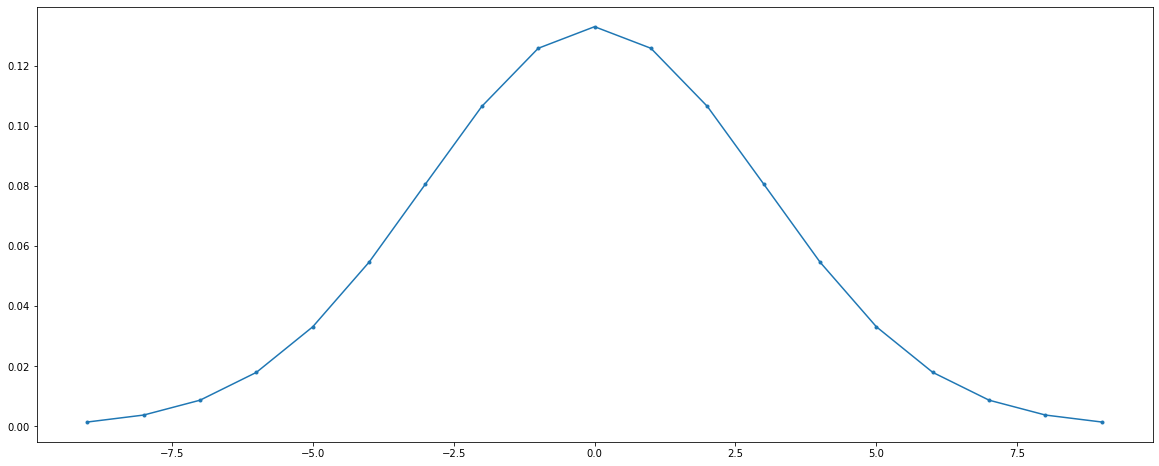

In [5]:
## function gauss
sigma = 3
Gx,x = gauss(sigma)
plt.figure(1)
plt.plot(x, Gx, '.-')
plt.show()

##### 1-D Box Filter

Implement a method which computes the values of a 1-D Box *Bx* for a given standard deviation $\sigma$ :
\begin{equation}
B= [\frac{1}{n},\frac{1}{n},\dots,\frac{1}{n}]\in \mathbb{R}^n 
\end{equation}

The method should also return a vector *x* of values on which the **Box** filter is defined: integer values on the interval $\left[-3\sigma,3\sigma\right]$.

In [7]:
def box(filter_size=3,show_verbose=False):
    """
    box function taking as argument the filter size.
    The filter should be defined for all integer values and centered at zero
    The function should return the Box values Bx computed at the indexes x
    """
    
    x = range(-filter_size//2, filter_size//2+1)
    Bx = [1/filter_size for _ in x]
    
    return Bx, x

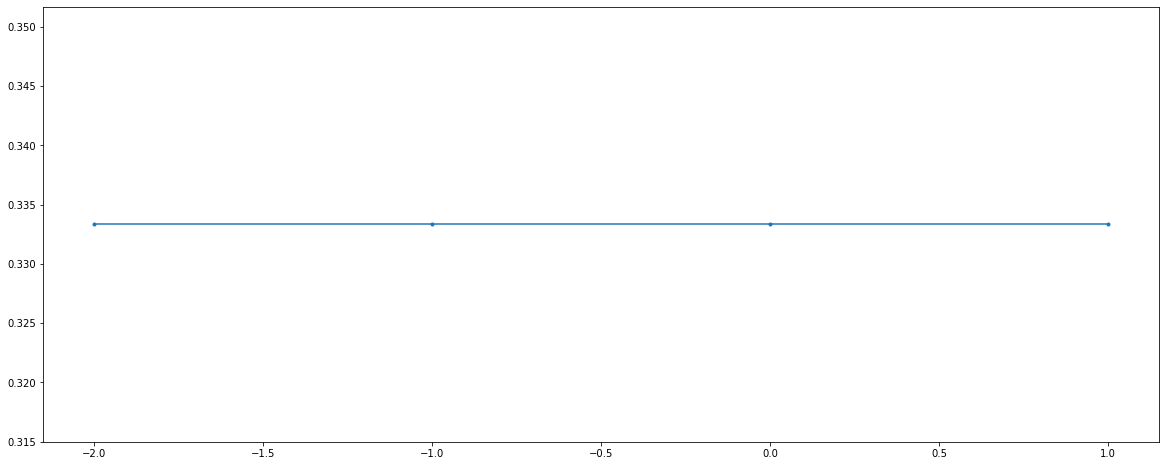

In [8]:
## function box
size = 3
Bx,x = box(size)
plt.figure(1)
plt.plot(x, Bx, '.-')
plt.show()

##### 2-D custom filter
Recreate the given 3x3 filter:

\begin{bmatrix}
-0.015 & -0.035 & -0.015\\
-0.035 & 0.8 &  -0.035 \\
-0.015 & -0.035 & -0.015
\end{bmatrix}

 The absolute value of the elements in the kernel sum to 1, in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign.

In [29]:
def custom():
    """ 
    This function returns the shown kernel. 
    """
    
    M = [[-0.015, -0.035, -0.015], 
         [-0.035, 0.8, -0.035], 
         [-0.015, -0.035, -0.015]]
      
    return np.array(M)

In [30]:
custom_filter = custom()
print(custom_filter)

[[-0.015 -0.035 -0.015]
 [-0.035  0.8   -0.035]
 [-0.015 -0.035 -0.015]]


##### Gauss derivative 1-D
Implement a function gaussdx for creating a Gaussian derivative filter in 1D:
$$
\frac{d}{dx}G =-\frac{1}{\sqrt{2\pi}\sigma^3}x\exp({-\frac{x^2}{2\sigma^2}})
$$
The function should also return a vector x of values on which the Gaussian derivative filter is
defined: integer values on the interval $[3\sigma; 3\sigma]$.

In [31]:
def gaussdx(sigma):
    x = range(-3*int(sigma),3*int(sigma)+1) 
    Dx = [-1 / (math.sqrt(2*math.pi)*sigma**3) * y * math.exp(-float(y)**2/(2*sigma**2)) for y in x]
    
    return Dx, x

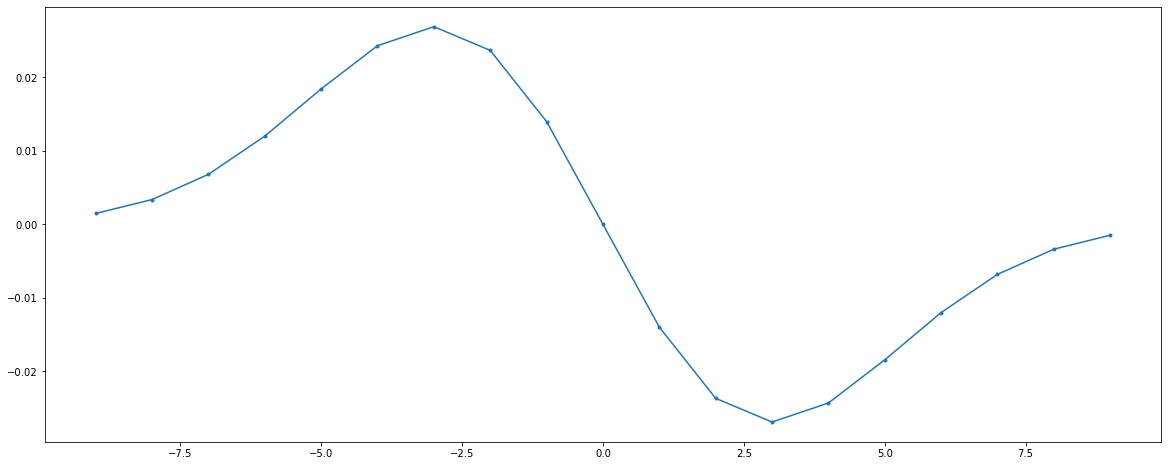

In [32]:
## function gaussdx
sigma = 3
DGx,x = gaussdx(sigma)
plt.figure(1)
plt.plot(x, DGx, '.-')
plt.show()

Here we convolve the filters you have just defined with the given image _'graf.png'_. 

##### 2-D Gaussian filter
The function should take an image as an input
and return the result of convolution of this image with 2D Gaussian kernel. You can take advantage of the Python’s convolve2D function if you don’t want to
implement convolution yourself.

In [33]:
def gaussfiltering(img, sigma):
    """
    Implement a 2D Gaussian filter, leveraging the previous gauss.
    Implement the filter from scratch or leverage the convolve or convolve2D methods (scipy.signal)
    Leverage the separability of Gaussian filtering
    Input: image, sigma (standard deviation)
    Output: smoothed image
    """
    
    G, _ = gauss(sigma) 
    Gx = np.array(G).reshape(1, len(G))
    Gy = np.array(G).reshape(len(G), 1)
    
    smooth_img = convolve(convolve(img, Gx, mode = 'same'), Gy, mode = 'same')
    
    # Or convolution with matrix
    # Gx, _ = gauss(sigma) 
    # gauss_kernel = np.outer(Gx, Gx) 
    # smooth_img = conv2(img, gauss_kernel, mode = "same")
    
    return np.array(smooth_img)

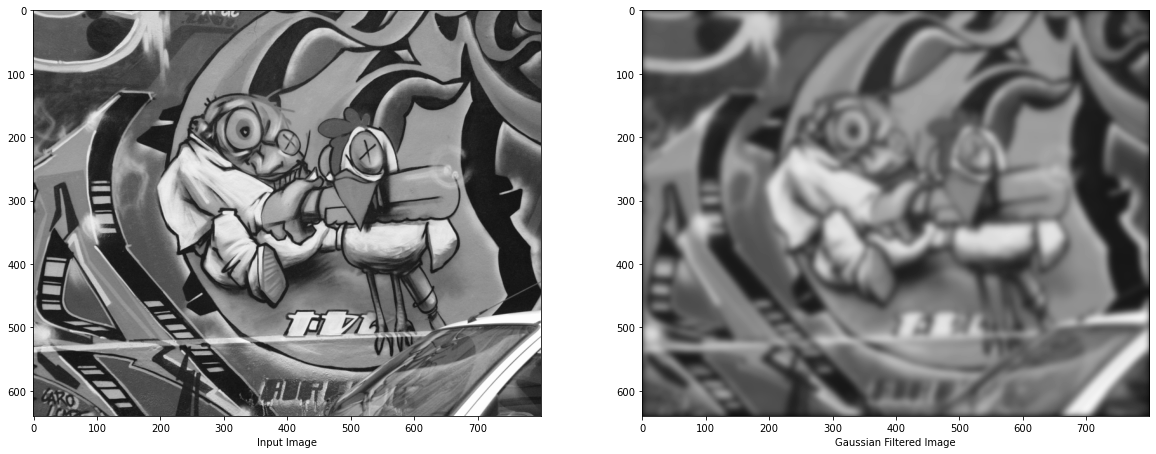

In [34]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = gaussfiltering(img, 5)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Gaussian Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### 2-D Box filter
The function should take an image as an input
and return the result of convolution of this image with 2D Box kernel. 

In [35]:
def boxfiltering(img, filter_size):
    """
    Implement a 2D Box filter, leveraging the previous box.
    Leverage the separability of Box filtering
    Input: image, filter_size
    Output: smoothed image
    """
     
    B, _ = box(filter_size) 
    Bx = np.array(B).reshape(1, len(B))
    By = np.array(B).reshape(len(B), 1)
    
    smooth_img = convolve(convolve(img, Bx, mode = 'same'), By, mode = 'same')
    
    # Or convolution with matrix
    # Bx, _ = box(filter_size)
    # box_kernel = np.outer(Bx, Bx)
    # smooth_img = conv2(img, box_kernel, mode = 'same')

    return np.array(smooth_img)

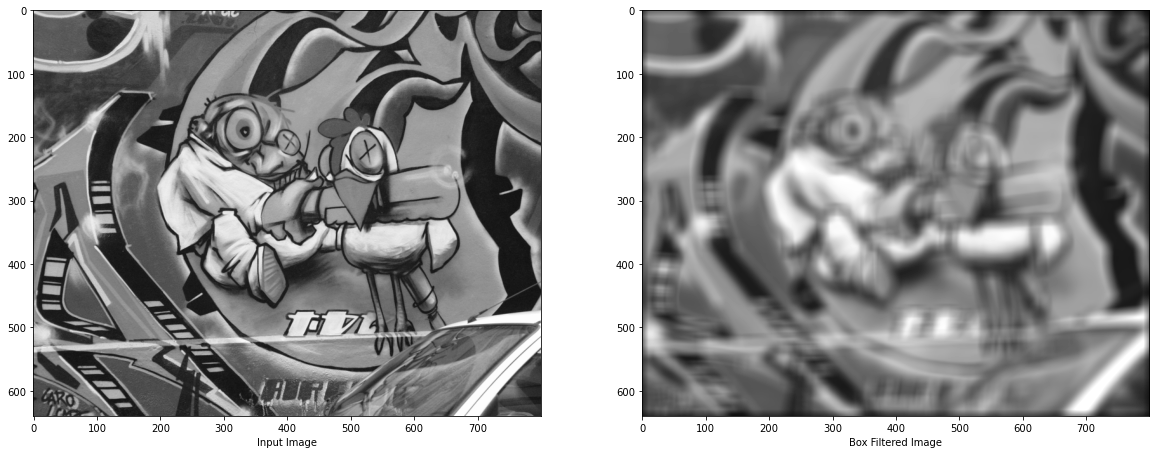

In [36]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = boxfiltering(img, 20)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Box Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

##### Custom Filter

In [37]:
def customfiltering(img):
    """
    Implement a 2D Custom filter
    Implement the filter from scratch 
    Input: image
    Output: smoothed image
    """
    
    kernel = custom()
    smooth_img = conv2(img, kernel, mode='same')

    return np.array(smooth_img)

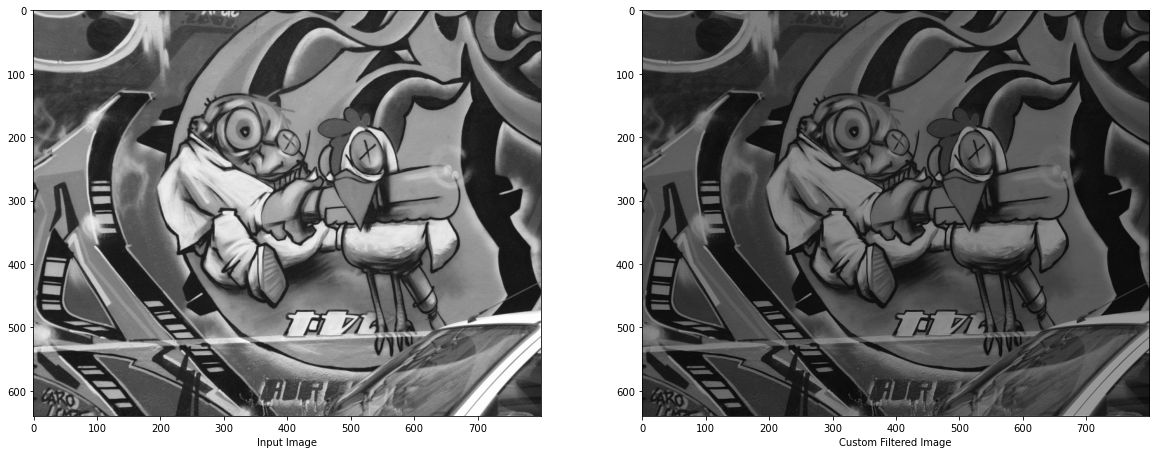

In [38]:
img = rgb2gray(np.array(Image.open('graf.png')))
smooth_img = customfiltering(img)
#print(smooth_img.shape)
plt.figure(2)
ax1 = plt.subplot(1,2,1)
ax1.set_xlabel('Input Image')
ax2 = plt.subplot(1,2,2)
ax2.set_xlabel('Custom Filtered Image')
plt.sca(ax1)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.sca(ax2)
plt.imshow(smooth_img, cmap='gray', vmin=0, vmax=255)
plt.show()

Implement a Gaussian Pyramid: 

* Apply Gaussian filter on original Image
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.
* Resize (Downscale) the smoothed image (obtained from previous step) and apply Gaussian filter again.


In [39]:
def downscale(img, factor):
    '''
    This function should return the given image
    resized by the factor.
    Input:
      img: the image to resize
      factor: the factor you want use to downscale
    Output:
      resized: the resized image
    '''

    resized = cv2.resize(img, dsize = (int(img.shape[1] * factor), int(img.shape[0] * factor)))

    return resized

In [40]:
def GaussianPyramid(img, steps=3, factor=0.5, sigma=4):
    '''
    This function implements the Gaussian Pyramid and shows the results.
    Leverage the "downscale" function.
    
    Inputs:
      img: the image
      steps: number of steps to use in performing the Pyramid
      factor: the scaling factor to resize the image at each step
      sigma: the Gaussian filter parameter
    
    Output:
      --
    '''
    
    for i in range(steps):
        smooth = gaussfiltering(img, sigma)
        
        plt.figure(2)
        ax1 = plt.subplot(1,2**(i+1),1)
        ax2 = plt.subplot(1,2**(i+1),2)
        plt.sca(ax1)
        plt.imshow(img, cmap = "gray", vmin = 0, vmax = 255)
        plt.sca(ax2)
        plt.imshow(smooth, cmap = "gray", vmin = 0, vmax = 255)
        plt.show()
        
        img = downscale(smooth, factor)

    return

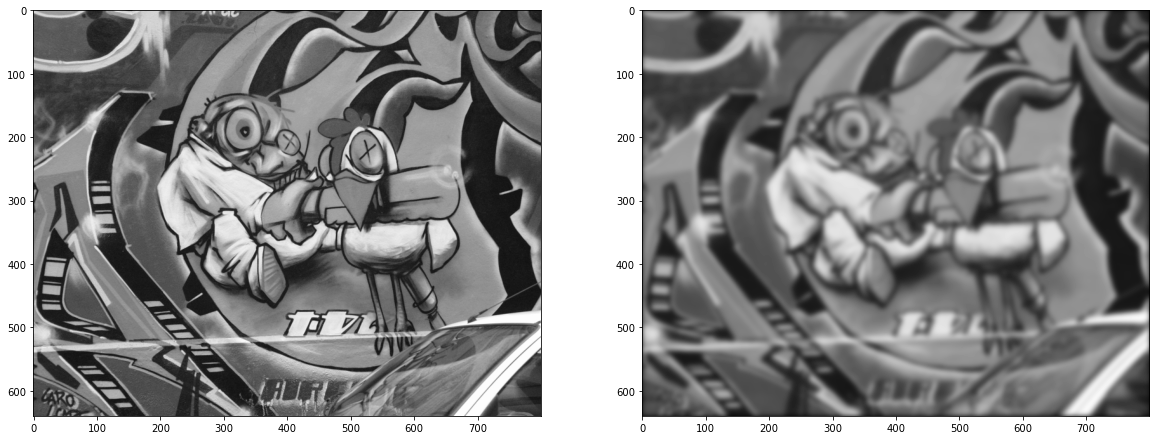

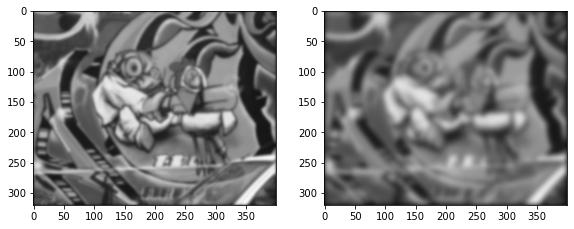

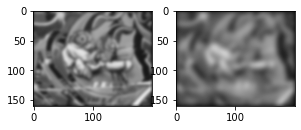

In [41]:
img = rgb2gray(np.array(Image.open('graf.png')))
GaussianPyramid(img)

Image filtering, in particular *linear filtering*, con be effectively used to reduce image noise, to fill missing informations in the image or to extract some image features (e.g. detect edges, enhance contrast,...). The idea behind linear filetring is (discrete) *convolution*: replace each pixel by some linear combination of its neighbors by convolving the image $I$ with a custom kernel $G$ where the filtered image $f$ is given by $$f[m,n]=I\otimes G=\sum_{k,l} I[m-k,n-l]G[k,l]\ .$$ In this first question we've used filters with a *gaussian kernel*, a *box kernel* and a *custom kernel*. The box filter replaces every pixel with an average of its neighbours and this smooths the image, but the smoothing is non-uniform in the sense that some features like the edges and contours are still very present in the transformed image, whereas some other features loose importance leaving some granulosity in the resulting filtered image. The gaussian filter instead weights nearby pixels more then the distant ones following a gaussian distribution, and this is ideal in a smoothing procedure since the resulting image is seems uniformly blurred. The custom filter is similar to the box filter, but it takes a weighted average of neighboring pixels of a given pixel in such a way that the overall brightness of the image decreases (in the middle position we find 80% of the weights and in the corners 30% of the remaining percentage with negative sign).

## Question 2: Identification

In [42]:
## import packages
import numpy as np
from PIL import Image
from numpy import histogram as hist
import matplotlib.pyplot as plt

In [45]:
def rgb2gray(rgb):
    r, g, b = rgb[:, :, 0], rgb[:, :, 1], rgb[:, :, 2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

For this question, we will implement the function **normalized hist**, which takes gray-value image as input and returns normalized histogram of pixel intensities. When quantizing the image to compute the histogram, consider that pixel intensities range in $[0, 255]$. By comparison with built-in Python function numpy.histogram our result should be approximately the same.

In [46]:
def normalized_hist(img_gray, num_bins = 40, show_verbose = False):   
    '''
    Compute histogram of image intensities, histogram should be normalized so that sum of all values equals 1
    assume that image intensity is between 0 and 255

    img_gray - input image in grayscale format
    num_bins - number of bins in the histogram

    '''
        
    hists = np.empty(num_bins)
    bins = np.linspace(0, 255, num_bins + 1)
    
    for i in range(num_bins):
        cond = np.logical_and(bins[i] < img_gray, img_gray < bins[i+1])
        hists[i] = len(img_gray[cond])
        
    return hists/np.sum(hists), bins

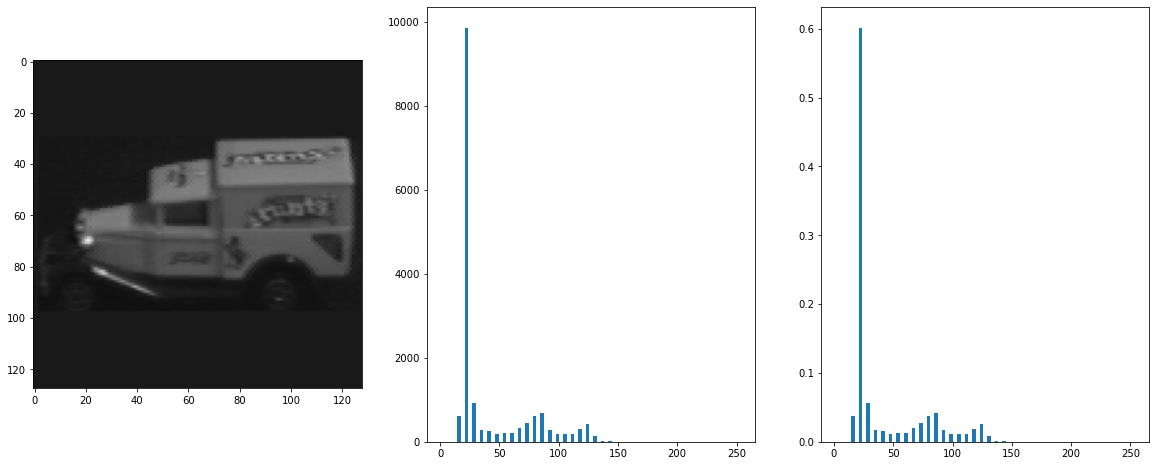

In [47]:
img_color = np.array(Image.open('model/obj100__0.png'))
img_gray = rgb2gray(img_color.astype('double'))

plt.figure(1)
plt.subplot(1,3,1)
plt.imshow(img_gray,cmap='gray', vmin=0, vmax=255)

plt.subplot(1,3,2)
num_bins_gray = 40
hist_gray1, bin_gray1 = hist(img_gray.reshape(img_gray.size), num_bins_gray,(0,255))
plt.bar((bin_gray1[0:-1] + bin_gray1[1:])/2, hist_gray1, width=3)

plt.subplot(1,3,3)
hist_gray2, bin_gray2 = normalized_hist(img_gray, num_bins_gray)
plt.bar((bin_gray2[0:-1] + bin_gray2[1:])/2, hist_gray2, width=3)
plt.show()

#### histogram types. 
As above, when quantizing the images to compute the histogram, we consider that “RGB” and “RG” range in
$[0, 255]$. For the case of dxdy hist, the actual image value ranges depend on the chosen Gaussian filtering
variance, used when computing the derivative. For this part we will set the standard deviation $σ = 3.0$ and
cap the pixel values to be in the range $[−6, 6]$, i.e. set all values below (above) the value of -6 (+6) to -6
(+6).

##### RGB

In [48]:
def rgb_hist(img_color_double, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram for each color channel in the image
    The histogram should be normalized so that sum of all values equals 1
    Assume that values in each channel vary between 0 and 255

    img_color - input color image
    num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^3

    E.g. hists[0,9,5] contains the number of image_color pixels such that:
        - their R values fall in bin 0
        - their G values fall in bin 9
        - their B values fall in bin 5
    '''
    
    hists = np.zeros((num_bins, num_bins, num_bins), dtype=int)
    
    bins_width = 256 / num_bins
    
    for R,G,B in img_color_double.reshape(-1, 3):
        redBin, blueBin, yellowBin = math.floor(R/bins_width), math.floor(G/bins_width),math.floor(B/bins_width)
        hists[redBin, blueBin, yellowBin]+=1

    hists = hists/np.sum(a = hists)
    
    return hists.flatten()

<BarContainer object of 125 artists>

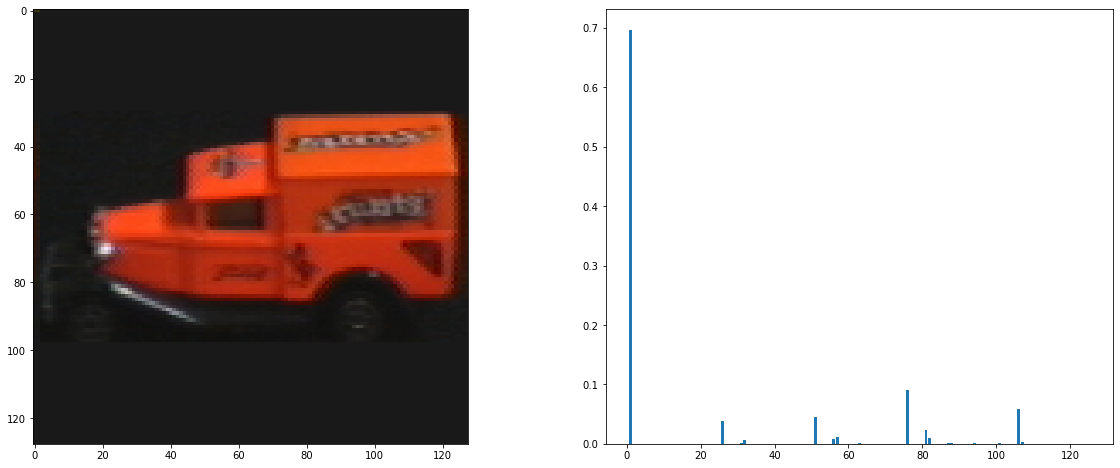

In [49]:
# Compose and test RGB histograms (rgb_hist)
plt.figure(2)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5

plt.subplot(1,2,2)
hist_rgb1 = rgb_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1, hist_rgb1.size+1)),hist_rgb1)

##### RG

In [50]:
def rg_hist(img_color_double, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram for the R and G color channels in the image
    The histogram should be normalized so that sum of all values equals 1
    Assume that values in each channel vary between 0 and 255

    img_color - input color image
    num_bins - number of bins used to discretize each channel, total number of bins in the histogram should be num_bins^2

    E.g. hists[0,9] contains the number of image_color pixels such that:
      - their R values fall in bin 0
      - their G values fall in bin 9
    '''
    
    hist = np.zeros((num_bins, num_bins), dtype=int)
    bins_width = 256 / num_bins
    
    for i in range(img_color_double.shape[0]) :
        for j in range(img_color_double.shape[1]) :
            
            r = img_color_double[i, j][0]
            g = img_color_double[i, j][1]
            
            hist[math.floor(r/bins_width),math.floor(g/bins_width)] +=1
            
    hist = hist / np.sum(hist)
    
    return hist.flatten()

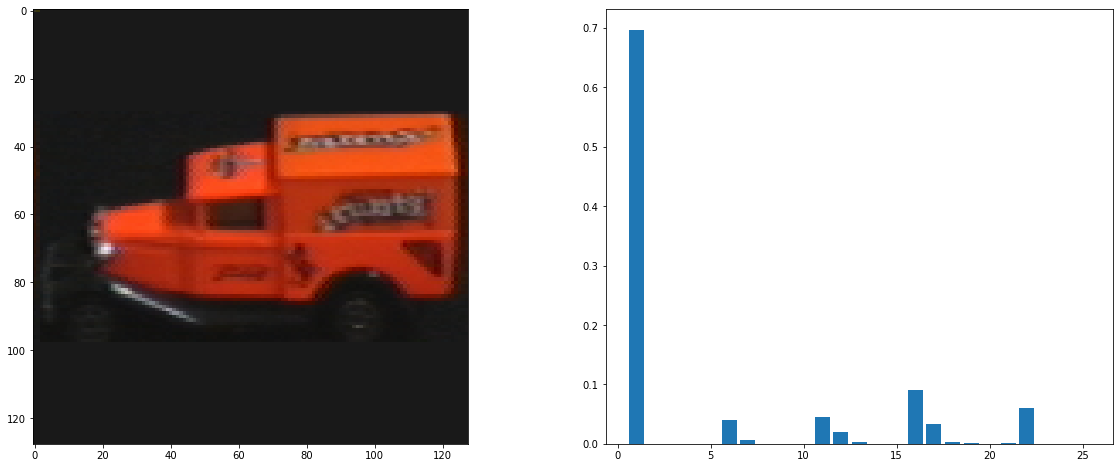

In [51]:
#Compose and test RG histograms (histogram_module.rg_hist)
plt.figure(3)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_color = 5
plt.subplot(1,2,2)
hist_rg = rg_hist(img_color.astype('double'), num_bins_color)
plt.bar(np.array(range(1,hist_rg.size+1)),hist_rg)
plt.show()

##### DXDY

In [52]:
def gaussderiv(img, sigma):
    
    smooth_img = gaussfiltering(img, sigma)

    D, _ = gaussdx(sigma)
    Dx = np.array(D).reshape(1, len(D))
    Dy = np.array(D).reshape(len(D), 1)
    
    imgDx = convolve(smooth_img, Dx, mode = 'same')
    imgDy = convolve(smooth_img, Dy, mode = 'same')  
    
    return imgDx, imgDy

In [57]:
def dxdy_hist(img_gray, num_bins = 5, show_verbose = False):
    '''
    Compute the *joint* histogram of Gaussian partial derivatives of the image in x and y direction
    Set sigma to 3.0 and cap the range of derivative values is in the range [-6, 6]
    The histogram should be normalized so that sum of all values equals 1
    img_gray - input gray value image
    num_bins - number of bins used to discretize each dimension, total number of bins in the histogram should be num_bins^2
    Note: you can use the function gaussderiv from the Filtering part
    '''
    
    imgDx, imgDy = gaussderiv(img_gray, 3)
    width, height = imgDx.shape
    
    imgDx = np.clip(imgDx, -6, 6) + 6
    imgDy = np.clip(imgDy, -6, 6) + 6
    
    hists = np.zeros((num_bins, num_bins), dtype = np.int32)
    _ , bin_size = np.linspace(-6, 6, num = num_bins + 1, retstep = True)
    
    for i in range(width):
        for j in range(height):
            dx, dy = int(imgDx[i, j] / bin_size), int(imgDy[i, j] / bin_size)
            
            if dx == num_bins:
                dx = num_bins - 1
            if dy == num_bins:
                dy = num_bins - 1
                
            hists[dx, dy] += 1
                
    hists = hists / np.sum(hists)
    hists = np.ndarray.flatten(hists)

    return hists

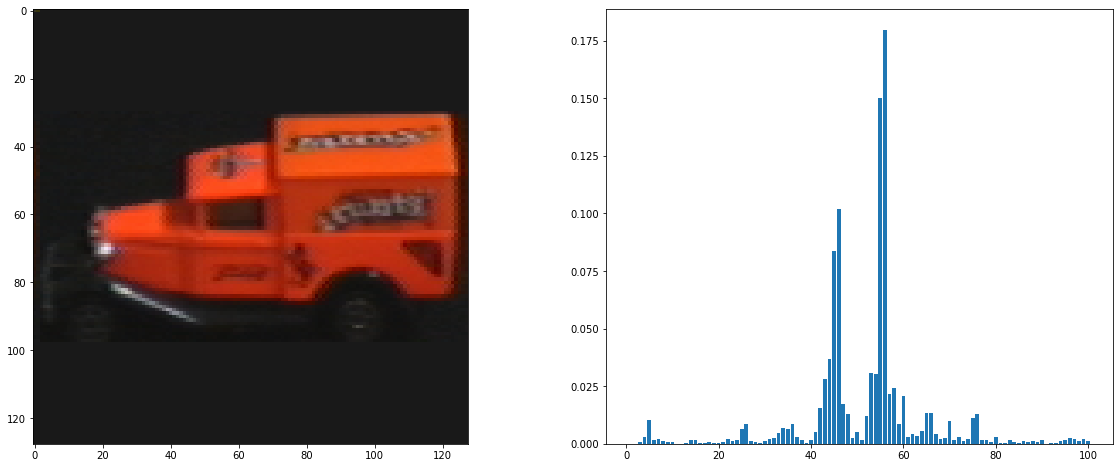

In [58]:
#Compose and test dxdy histograms (histogram_module.dxdy_hist)

plt.figure(5)
plt.subplot(1,2,1)
plt.imshow(img_color)

num_bins_dxdy = 10
plt.subplot(1,2,2)
hist_dxdy = dxdy_hist(img_gray, num_bins_dxdy)
plt.bar(np.array(range(1,hist_dxdy.size+1)),hist_dxdy)
plt.show()

In more details, implement the function *dist_intersect*:
\begin{equation}
\bigcap(Q,V)=1-\frac{1}{2}\left(
\frac{\sum_i \min(q_i,v_i)}{\sum_i q_i} +
\frac{\sum_i \min(q_i,v_i)}{\sum_i v_i}
\right)
\end{equation}

the *dist_l2* function:
\begin{equation}
d(Q,V)=\sqrt{\sum_i (q_i-v_i)^2}
\end{equation}

and the *dist_chi2*:
\begin{equation}
\chi^2(Q,V)=\sum_i \frac{(q_i-v_i)^2}{q_i + v_i}
\end{equation}


In [59]:
def dist_intersect(x,y):
    '''
    Compute the intersection distance between histograms x and y
    Return 1 - hist_intersection, so smaller values correspond to more similar histograms
    Check that the distance range in [0,1]
    '''
    
    sum_of_mins = sum([min(x_i, y_i) for x_i, y_i in zip(x,y)])
    hist_intersection = 0.5 * (sum_of_mins / sum(x) + sum_of_mins / sum(y))
    
    return 1 - hist_intersection


def dist_l2(x,y):
    '''
    Compute the L2 distance between x and y histograms
    Check that the distance range in [0,sqrt(2)]
    '''
    
    l2_dist = sum([(x_i - y_i)**2 for x_i, y_i in zip(x,y)])
    
    return math.sqrt(l2_dist)


def dist_chi2(x,y):
    '''
    Compute chi2 distance between x and y
    Check that the distance range in [0,Inf]
    Add a minimum score to each cell of the histograms (e.g. 1) to avoid division by 0
    '''
    
    x = [x_i + 1 for x_i in x]
    y = [y_i + 1 for y_i in y]

    chi2_dist = sum([(x_i - y_i)**2 / (x_i + y_i) for x_i, y_i in zip(x,y)])

    return chi2_dist

## Question 3: Object Identification 

Having implemented different distance functions and image histograms, we can now test how suitable
they are for retrieving images in query-by-example scenario. 

In [60]:
def is_grayvalue_hist(hist_name):
    '''
    Handle function to discriminate when your input 
    function is in gray_scale or colors.
    '''
    if hist_name == 'grayvalue' or hist_name == 'dxdy':
        return True
    elif hist_name == 'rgb' or hist_name == 'rg':
        return False
    else:
        assert False, 'unknown histogram type'


def get_hist_by_name(img, num_bins_gray, hist_name):
    '''
    Handle function to get the correct historgam function 
    by his name.
    '''
    if hist_name == 'grayvalue':
        return normalized_hist(img, num_bins_gray)
    elif hist_name == 'rgb':
        return rgb_hist(img, num_bins_gray)
    elif hist_name == 'rg':
        return rg_hist(img, num_bins_gray)
    elif hist_name == 'dxdy':
        return dxdy_hist(img, num_bins_gray)
    else:
        assert False, 'unknown hist type: %s'%hist_name


def get_dist_by_name(x, y, dist_name):
    '''
    Handle function to get the correct distance function 
    by his name.
    '''
    if dist_name == 'chi2':
        return dist_chi2(x,y)
    elif dist_name == 'intersect':
        return dist_intersect(x,y)
    elif dist_name == 'l2':
        return dist_l2(x,y)
    elif dist_name == 'all':
        pass
    else:
        assert False, 'unknown distance: %s'%dist_name

def read_files():
    '''
    Handle function to read query and model files
    '''
    with open('model.txt') as fp:
        model_images = fp.readlines()
    model_images = [x.strip() for x in model_images]

    with open('query.txt') as fp:
        query_images = fp.readlines()
    query_images = [x.strip() for x in query_images]

    return query_images, model_images

In [66]:
# note: use functions 'get_dist_by_name', 'get_hist_by_name' and 'is_grayvalue_hist' to obtain 
#       handles to distance and histogram functions, and to find out whether histogram function 
#       expects grayvalue or color image

def compute_histograms(image_list, hist_type, hist_isgray, num_bins):
    '''
    this function returns a list containing the histograms for
    the list of images given as input.
    '''
    image_hist = []
    
    for img in image_list:
        img = np.array(Image.open(img))
        
        if hist_isgray:
            img = rgb2gray(img)
        
        image_hist.append(get_hist_by_name(img, num_bins, hist_type))
            
    return image_hist



def find_best_match(model_images, query_images, dist_type, hist_type, num_bins):
    '''
    Function to find the best match for each image in the 
    query folder.
    Input:
      model_images: list of strings with the path of model images.
      query_images: list of strings with the path of query images.
      dist_type:    a string to represent the name of the distance you want to 
                    use. Should be one among "l2", "intersect", "chi2".
      hist_type:    a string to represent the name of the histogram you want to 
                    use. Should be one among "grayvalue", "rgb", "rg", "dxdy".
    
    Output:
      best_match:   list containing in each position the index of the retrieved
                    best matching image.
      D:            Matrix with |model_images| rows and |query_images| columns
                    containing the scores of each matching.
    '''
    
    rows = len(model_images)
    cols = len(query_images)
    
    best_match = []
    D = np.zeros((rows, cols))
        
    # Compute model images hists
    model_histograms = compute_histograms(model_images, hist_type, is_grayvalue_hist(hist_type), num_bins)
        
    # Compute input images hists
    query_histograms = compute_histograms(query_images, hist_type, is_grayvalue_hist(hist_type), num_bins)
    
    for r, c in [(r, c) for r in range(rows) for c in range(cols)]:
        D[r, c] = get_dist_by_name(model_histograms[r], query_histograms[c], dist_type)
        
        # At the end of the row,
        # the index of the shortest distance for that row
        # is appended to best match
        if c == cols - 1:
            best_match.append( np.where( D[r] == np.min(D[r]) )[0][0] )

    return np.array(best_match), D

In [67]:
# model_images - list of file names of model images
# query_images - list of file names of query images

query_images, model_images = read_files()

dist_type = 'intersect'
hist_type = 'rgb'
num_bins = 10

[best_match, D] = find_best_match(
    model_images, query_images, dist_type, hist_type, num_bins)

print("Indexes of correct retrieved images is:\n ", *np.where(best_match == np.arange(len(query_images))))
print("The Recognition rate is", sum(best_match == np.arange(len(query_images)))/len(query_images))

Indexes of correct retrieved images is:
  [ 0  1  2  3  5  6  8  9 10 11 12 13 14 16 17 18 19 21 23 24 26 27 28 29
 30 32 33 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51 52 54 55 56 57
 58 59 60 64 66 69 70 71 72 74 75 77 78 79 80 81 82 83 84 85 86 87 88]
The Recognition rate is 0.797752808988764


Implement a function **show_neighbors** which takes a list of model images and a list of
query images and for each query image visualizes several model images which are closest to the query image
according to the specified distance metric.

In [63]:
def show_neighbors(model_images, query_images, dist_type, hist_type, num_bins):
    '''
    For each image file from 'query_images' find and visualize the 5 nearest images from 'model_image'.

    Note: use the previously implemented function 'find_best_match'
    Note: use subplot command to show all the images in the same Python figure, one row per query image
    
    '''
    
    _, D = find_best_match(model_images, query_images, dist_type, hist_type, num_bins)
    
    num_of_nearest = 5
    num_of_queries = len(query_images)
        
    fig, axs = plt.subplots(num_of_queries, num_of_nearest + 1)
       
    # the loop iterates over the rows of the transpose of D
    # (rows = query images, columns = model images)
    for i, query in enumerate(query_images):
        
        # list of the distances to the 'num_of_nearest' images in model_images
        # which are closest to the 'query' image
        nearest_dist = np.sort(D.T[i])[:num_of_nearest]
        
        # list of the indexes of the 'num_of_nearest' images in model_images
        # whose distances are closest to the 'query' image
        nearest_idx = np.argsort(D.T[i])[:num_of_nearest]
        
        axs[i, 0].imshow(Image.open(query))
        axs[i, 0].set_title(f"Query {i+1}")
        axs[i, 0].set_axis_off()
        
        for j, img in enumerate(nearest_idx):
            axs[i, j+1].imshow(Image.open(model_images[img]))
            axs[i, j+1].set_title(f"Match {j+1} ({nearest_dist[j]:.3f})")
            axs[i, j+1].set_axis_off()
        
    return

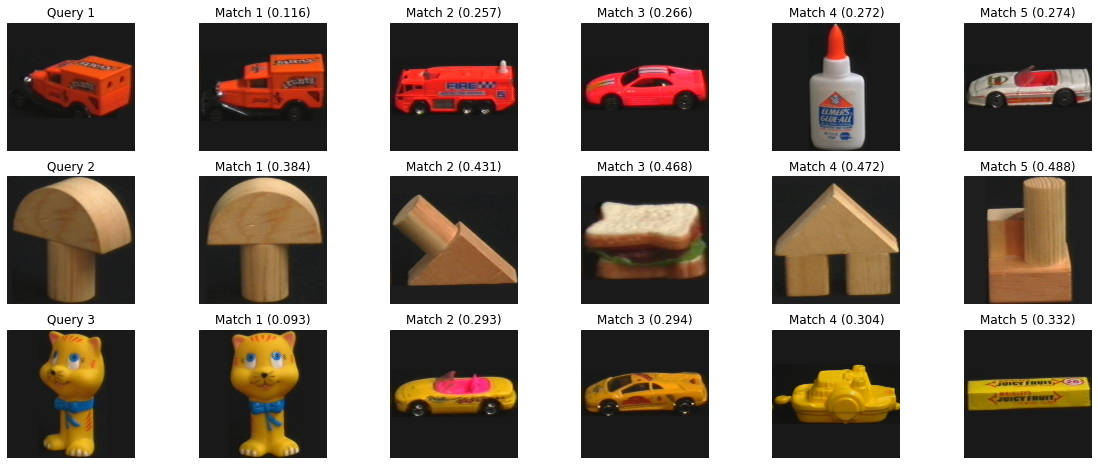

In [64]:
## visualize nearest neighbors
query_images_vis = [query_images[i] for i in np.array([0,4,9])]
show_neighbors(model_images, query_images_vis, dist_type, hist_type, num_bins)

In [68]:
num_correct = sum(best_match == range(len(query_images)))
print('number of correct matches: %d (%f)\n'% (num_correct, 1.0 * num_correct / len(query_images)))

number of correct matches: 71 (0.797753)



After several experiments, we noticed that the distances "chi2" and "l2" show a similar behavior: both produce the best result with 7 bins and the accuracy decreases as the number of bins increases. The "intersect" distance, on the other hand, has a completely different behavior: it produces a good recognition rate across many different choices of number of bins, and its value does not have a linear decreasing trend, but rather it oscillates around 0.9, as we can appreciate in the plot below.


|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 3 | intersect | 0.7303370786516854 |
| 2 | 5 | intersect | 0.8202247191011236 |
| 3 | 7 | intersect | 0.8426966292134831 |
| 4 | 9 | intersect | 0.8202247191011236 |
| 5 | 11 | intersect | 0.9213483146067416 |
| 6 | 13 | intersect | 0.898876404494382 |
| 7 | 15 | intersect | 0.9213483146067416 |
| 8 | 17 | intersect | 0.8876404494382092 |
| 9 | 21 | intersect | 0.9213483146067416 |
| 10 | 25 | intersect | 0.8876404494382022 |
| **11** | **31** | **intersect** | **0.9438202247191011** |
| 12 | 37 | intersect | 0.8539325842696629 |

|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 3 | chi2 | 0.6966292134831461 |
| 2 | 5 | chi2 | 0.7415730337078652 |
| 3 | **7** | **chi2** | **0.7640449438202247** |
| 4 | 9 | chi2 | 0.6966292134831461 |
| 5 | 11 | chi2 | 0.7078651685393258 |
| 6 | 13 | chi2 | 0.6629213483146067 |
| 7 | 15 | chi2 | 0.6404494382022472 |
| 8 | 17 | chi2 | 0.6404494382022472 |
| 9 | 21 | chi2 | 0.5955056179775281 |
| 10 | 25 | chi2 | 0.5393258426966292 |
| 11 | 31 | chi2 | 0.5280898876404494 |
| 12 | 37 | chi2 | 0.4382022471910112 |

|  | Number of Bins | Metric(Distance Metric) | Accuracy |
|---|---|---|---|
| 1 | 3 | l2 | 0.651685393258427 |
| 2 | 5 | l2 | 0.6966292134831461 |
| **3** | **7** | **l2** | **0.7078651685393258** |
| 4 | 9 | l2 | 0.6741573033707865 |
| 5 | 11 | l2 | 0.6741573033707865 |
| 6 | 13 | l2 | 0.6404494382022472 |
| 7 | 15 | l2 | 0.6067415730337079 |
| 8 | 17 | l2 | 0.5842696629213483 |
| 9 | 21 | l2 | 0.5842696629213483 |
| 10 | 25 | l2 | 0.5056179775280899 |
| 11 | 31 | l2 | 0.47191011235955055 |
| 12 | 37 | l2 | 0.4044943820224719 |

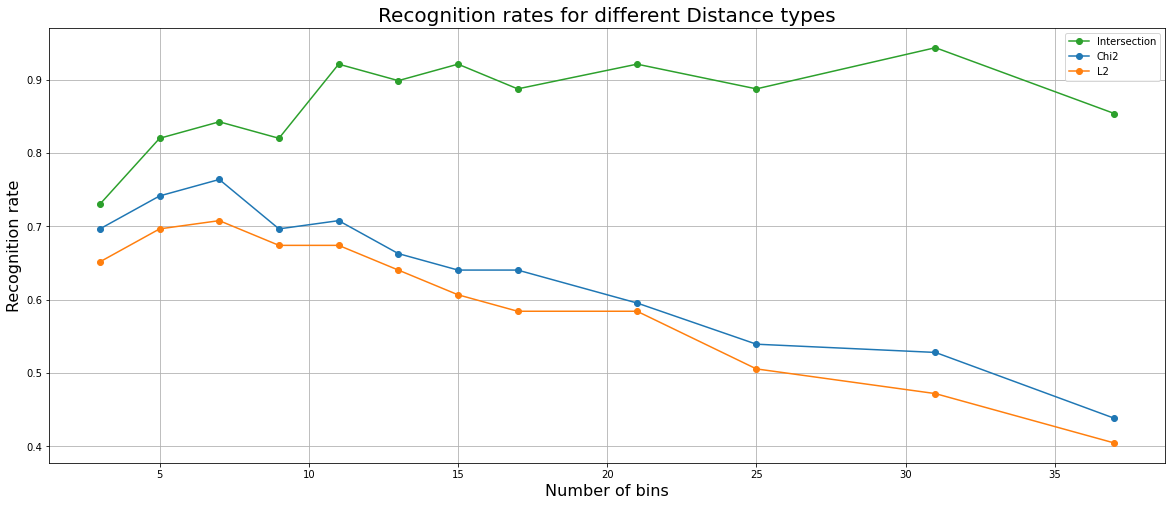

In [69]:
import matplotlib.patches as mpatches

bins = [3, 5, 7, 9, 11, 13, 15, 17, 21, 25, 31, 37]

chi2 = [0.6966292134831461, #3
        0.7415730337078652, #5
        0.7640449438202247, #7
        0.6966292134831461, #9
        0.7078651685393258, #11
        0.6629213483146067, #13
        0.6404494382022472, #15
        0.6404494382022472, #17
        0.5955056179775281, #21
        0.5393258426966292, #25
        0.5280898876404494, #31
        0.4382022471910112] #37
         
l2 = [0.651685393258427,  #3
      0.6966292134831461, #5
      0.7078651685393258, #7
      0.6741573033707865, #9
      0.6741573033707865, #11
      0.6404494382022472, #13
      0.6067415730337079, #15 
      0.5842696629213483, #17
      0.5842696629213483, #21
      0.5056179775280899, #25
      0.47191011235955055,#31
      0.4044943820224719] #37

inter = [0.7303370786516854, #3
         0.8202247191011236, #5
         0.8426966292134831, #7
         0.8202247191011236, #9
         0.9213483146067416, #11
         0.898876404494382,  #13
         0.9213483146067416, #15
         0.8876404494382092, #17
         0.9213483146067416, #21
         0.8876404494382022, #25
         0.9438202247191011, #31
         0.8539325842696629] #37

plt.title("Recognition rates for different Distance types", fontsize = 20)
plt.xlabel("Number of bins", fontsize = 16)
plt.ylabel("Recognition rate", fontsize = 16)

chi2_plot, = plt.plot(bins, chi2, 
                      marker = "o", 
                      label = "Chi2")
l2_plot, = plt.plot(bins, l2, 
                    marker = "o", 
                    label = "L2")
inter_plot, = plt.plot(bins, inter, 
                       marker = "o", 
                       label = "Intersection")
plt.legend(handles = [inter_plot, chi2_plot, l2_plot])

plt.grid()